#Unsupervised Learning 구현

#K-means Clustering

##데이터 불러오기  
구글 드라이브 내 'StudentsPdrformance.csv' 파일에 접근

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
print(df['gender'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['lunch'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


##시각화
이상치 확인

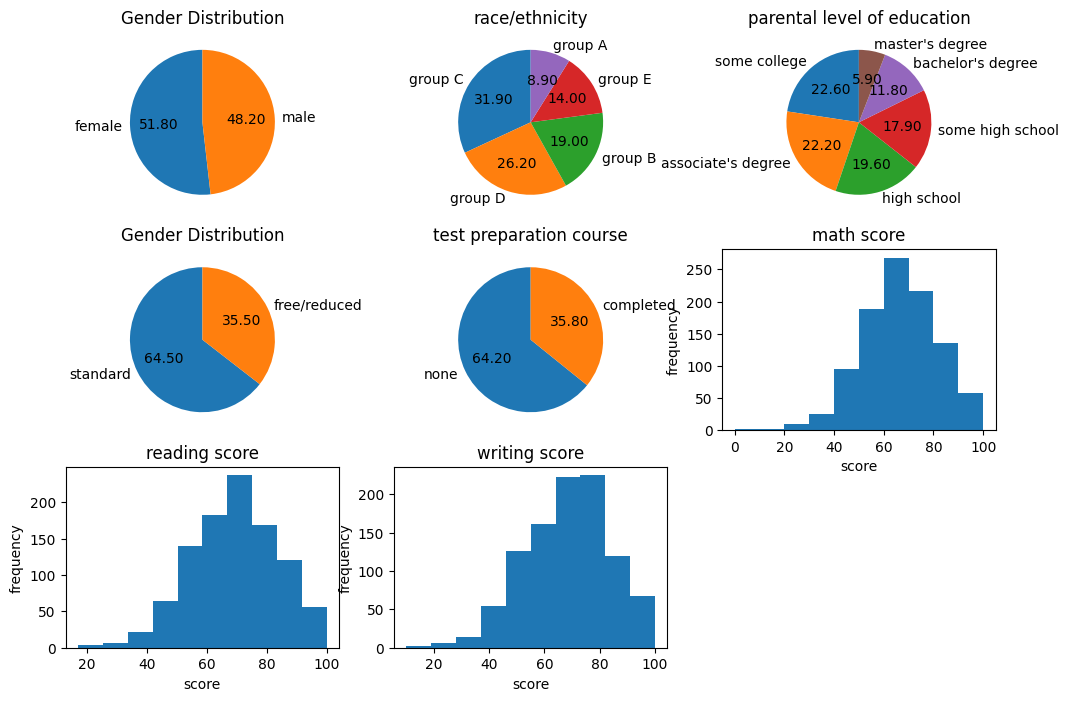

In [21]:
import matplotlib.pyplot as plt

# 시각화를 위한 그래프 크기 설정
plt.figure(figsize=(12, 8))

# gender
plt.subplot(331) # 3x3 그리드의 첫 번째 위치
plt.pie(df['gender'].value_counts().values, labels=df['gender'].value_counts().index, startangle=90, autopct='%.2f')
plt.title("Gender Distribution")

# race/ethnicity
plt.subplot(332)
plt.pie(df['race/ethnicity'].value_counts().values, labels=df['race/ethnicity'].value_counts().index, startangle=90, autopct='%.2f')
plt.title("race/ethnicity")

# parental level of education
plt.subplot(333)
plt.pie(df['parental level of education'].value_counts().values, labels=df['parental level of education'].value_counts().index, startangle=90, autopct='%.2f')
plt.title("parental level of education")

# lunch
plt.subplot(334)
plt.pie(df['lunch'].value_counts().values, labels=df['lunch'].value_counts().index, startangle=90, autopct='%.2f')
plt.title("Gender Distribution")

# test preparation course
plt.subplot(335)
plt.pie(df['test preparation course'].value_counts().values, labels=df['test preparation course'].value_counts().index, startangle=90, autopct='%.2f')
plt.title("test preparation course")

# math score
plt.subplot(336)
plt.hist(df['math score'])
plt.xlabel('score')
plt.ylabel('frequency')
plt.title("math score")

# reading score
plt.subplot(337)
plt.hist(df['reading score'])
plt.xlabel('score')
plt.ylabel('frequency')
plt.title("reading score")

# writing score
plt.subplot(338)
plt.hist(df['writing score'])
plt.xlabel('score')
plt.ylabel('frequency')
plt.title("writing score")

# 그래프 표시
plt.show()

##결측치 확인

In [22]:
#결측치 확인
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


##converting categorical data  
'gender', 'lunch', 'test preparation course'는 one hot encoding  
'race/ethnicity', 'parental level of education'는 label encoding

In [33]:
gender = pd.get_dummies(df['gender'], drop_first=True)
lunch = pd.get_dummies(df['lunch'], drop_first=True)
test_preparation_course = pd.get_dummies(df['test preparation course'], drop_first=True)
data = pd.concat([df,gender,lunch,test_preparation_course], axis=1)
data = data.drop(columns=['gender', 'lunch', 'test preparation course'])
data = data.rename(columns={'male':'gender', 'standard':'lunch', 'none':'test preparation course'})
data

,race/ethnicity,parental level of education,math score,reading score,writing score,gender,lunch,test preparation course
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,1,0
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,0,1
4,group C,some college,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,group E,master's degree,88,99,95,0,1,0
996,group C,high school,62,55,55,1,0,1
997,group C,high school,59,71,65,0,0,0
998,group D,some college,68,78,77,0,1,0


In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['race/ethnicity'] = label_encoder.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label_encoder.fit_transform(data['parental level of education'])
data

,race/ethnicity,parental level of education,math score,reading score,writing score,gender,lunch,test preparation course
0,1,1,72,72,74,0,1,1
1,2,4,69,90,88,0,1,0
2,1,3,90,95,93,0,1,1
3,0,0,47,57,44,1,0,1
4,2,4,76,78,75,1,1,1
...,...,...,...,...,...,...,...,...
995,4,3,88,99,95,0,1,0
996,2,2,62,55,55,1,0,1
997,2,2,59,71,65,0,0,0
998,3,4,68,78,77,0,1,0


##모델 훈련

elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

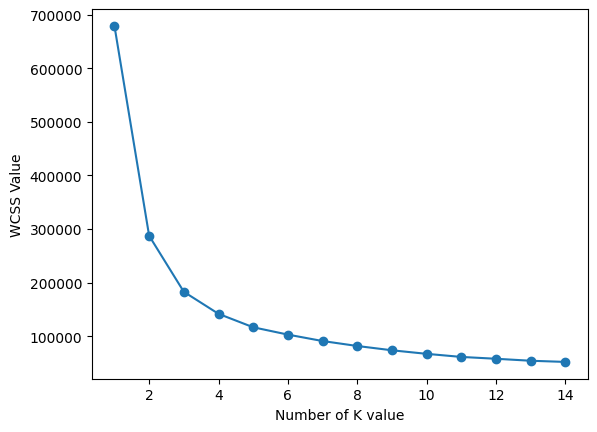

In [35]:
from sklearn.cluster import KMeans

# Within Cluster Sum of Squares = 군집 내 총 제곱합
wcss = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

Elbow point가 clear하진 않지만,  
K = 4로 설정

In [60]:
kmeans4 = KMeans(n_clusters=4, n_init='auto', random_state=42)
y_kmeans = kmeans4.fit_predict(data)
y_kmeans

array([2, 0, 0, 3, 2, 2, 0, 3, 2, 3, 1, 3, 2, 2, 1, 2, 0, 3, 3, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 0, 1, 2, 3, 0, 0, 3, 0, 1, 1, 3, 2, 3, 1, 2, 1, 1,
       3, 2, 1, 1, 1, 1, 3, 1, 3, 3, 3, 0, 2, 2, 3, 3, 1, 2, 3, 2, 0, 2,
       2, 0, 2, 3, 2, 3, 0, 0, 1, 2, 1, 1, 2, 2, 0, 3, 0, 2, 0, 1, 2, 2,
       0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 3,
       2, 0, 2, 1, 3, 1, 1, 2, 2, 1, 1, 3, 0, 3, 0, 2, 2, 0, 2, 2, 2, 3,
       1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 3, 0,
       1, 2, 1, 0, 2, 1, 3, 2, 3, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 0, 3, 1, 1, 0, 0, 0, 3, 2, 1,
       2, 0, 1, 0, 1, 1, 2, 1, 2, 0, 2, 3, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       2, 3, 2, 2, 0, 2, 1, 3, 1, 2, 0, 2, 0, 2, 2, 1, 3, 3, 2, 2, 3, 0,
       0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 3, 2, 3, 0, 0,

실루엣 점수  
객체가 다른 클러스터(seperation)에 비해 자신의 클러스터(cohesion)와 얼마나 유사한 지 측정한다.  
범위는 -1에서 +1까지이며, 값이 높을수록 객체가 자신의 클러스터와 잘 일치하고 다른 인접 클러스터와 잘 일치하지 않는다.  
값이 낮거나 음수이면 클러스터링 구성에 클러스터가 너무 많거나 적을 수 있다.

In [61]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 출력
score = silhouette_score(data, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.35


k=3,5일 때 실루엣 점수

In [66]:
kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
y_kmeans3 = kmeans3.fit_predict(data)
score3 = silhouette_score(data, y_kmeans3)
print(f"Silhouette Score(k=3): {score3:.2f}")

kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)
y_kmeans5 = kmeans5.fit_predict(data)
score5 = silhouette_score(data, y_kmeans5)
print(f"Silhouette Score(k=5): {score5:.2f}")

Silhouette Score(k=3): 0.40
Silhouette Score(k=5): 0.31


##clustering 결과 시각화

가로는 math score, 세로는 reading score

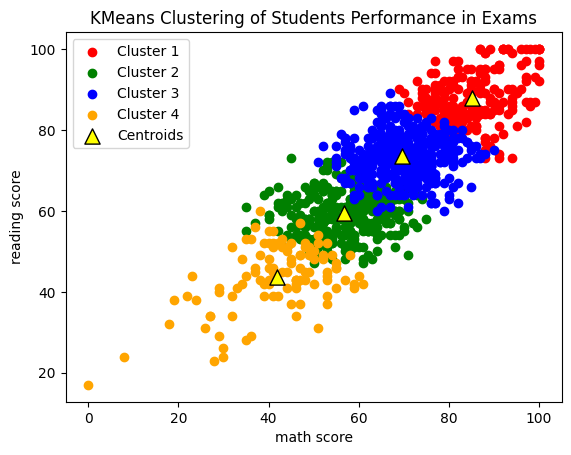

In [62]:
# 클러스터링 결과 시각화
plt.scatter(data['math score'][y_kmeans == 0],data['reading score'][y_kmeans == 0],color="red", label='Cluster 1')
plt.scatter(data['math score'][y_kmeans == 1],data['reading score'][y_kmeans == 1],color="green", label='Cluster 2')
plt.scatter(data['math score'][y_kmeans == 2],data['reading score'][y_kmeans == 2],color="blue", label='Cluster 3')
plt.scatter(data['math score'][y_kmeans == 3],data['reading score'][y_kmeans == 3],color="orange", label='Cluster 4')

# math score의 column index는 2, reading score는 3, writing score는 4
plt.scatter(kmeans4.cluster_centers_[:, 2], kmeans4.cluster_centers_[:, 3],
            marker='^', s=120, c='yellow', edgecolor='k', label='Centroids')
plt.title('KMeans Clustering of Students Performance in Exams')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.legend()
plt.show()

가로는 math score, 세로는 writing score

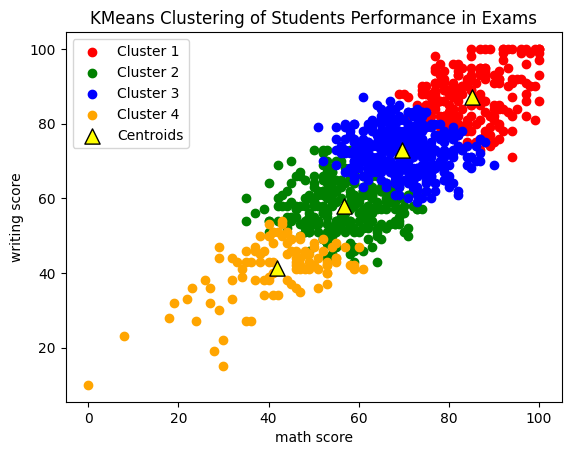

In [63]:
# 클러스터링 결과 시각화
plt.scatter(data['math score'][y_kmeans == 0],data['writing score'][y_kmeans == 0],color="red", label='Cluster 1')
plt.scatter(data['math score'][y_kmeans == 1],data['writing score'][y_kmeans == 1],color="green", label='Cluster 2')
plt.scatter(data['math score'][y_kmeans == 2],data['writing score'][y_kmeans == 2],color="blue", label='Cluster 3')
plt.scatter(data['math score'][y_kmeans == 3],data['writing score'][y_kmeans == 3],color="orange", label='Cluster 4')

# math score의 column index는 2, reading score는 3, writing score는 4
plt.scatter(kmeans4.cluster_centers_[:, 2], kmeans4.cluster_centers_[:, 4],
            marker='^', s=120, c='yellow', edgecolor='k', label='Centroids')
plt.title('KMeans Clustering of Students Performance in Exams')
plt.xlabel('math score')
plt.ylabel('writing score')
plt.legend()
plt.show()

가로는 reading score, 세로는 writing score

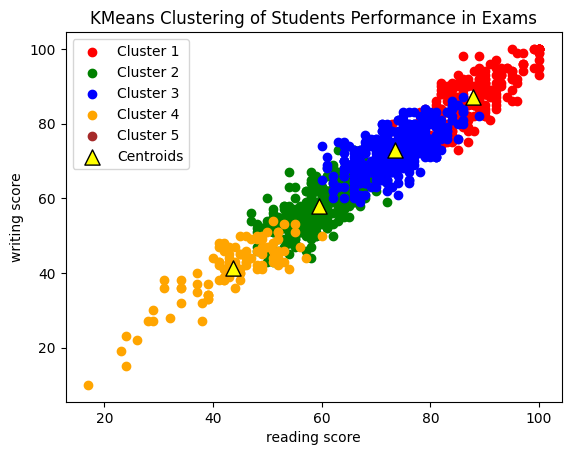

In [64]:
# 클러스터링 결과 시각화
plt.scatter(data['reading score'][y_kmeans == 0],data['writing score'][y_kmeans == 0],color="red", label='Cluster 1')
plt.scatter(data['reading score'][y_kmeans == 1],data['writing score'][y_kmeans == 1],color="green", label='Cluster 2')
plt.scatter(data['reading score'][y_kmeans == 2],data['writing score'][y_kmeans == 2],color="blue", label='Cluster 3')
plt.scatter(data['reading score'][y_kmeans == 3],data['writing score'][y_kmeans == 3],color="orange", label='Cluster 4')
plt.scatter(data['reading score'][y_kmeans == 4],data['writing score'][y_kmeans == 4],color="brown", label='Cluster 5')
# math score의 column index는 2, reading score는 3, writing score는 4
plt.scatter(kmeans4.cluster_centers_[:, 3], kmeans4.cluster_centers_[:, 4],
            marker='^', s=120, c='yellow', edgecolor='k', label='Centroids')
plt.title('KMeans Clustering of Students Performance in Exams')
plt.xlabel('reading score')
plt.ylabel('writing score')
plt.legend()
plt.show()

Visualization in 3D

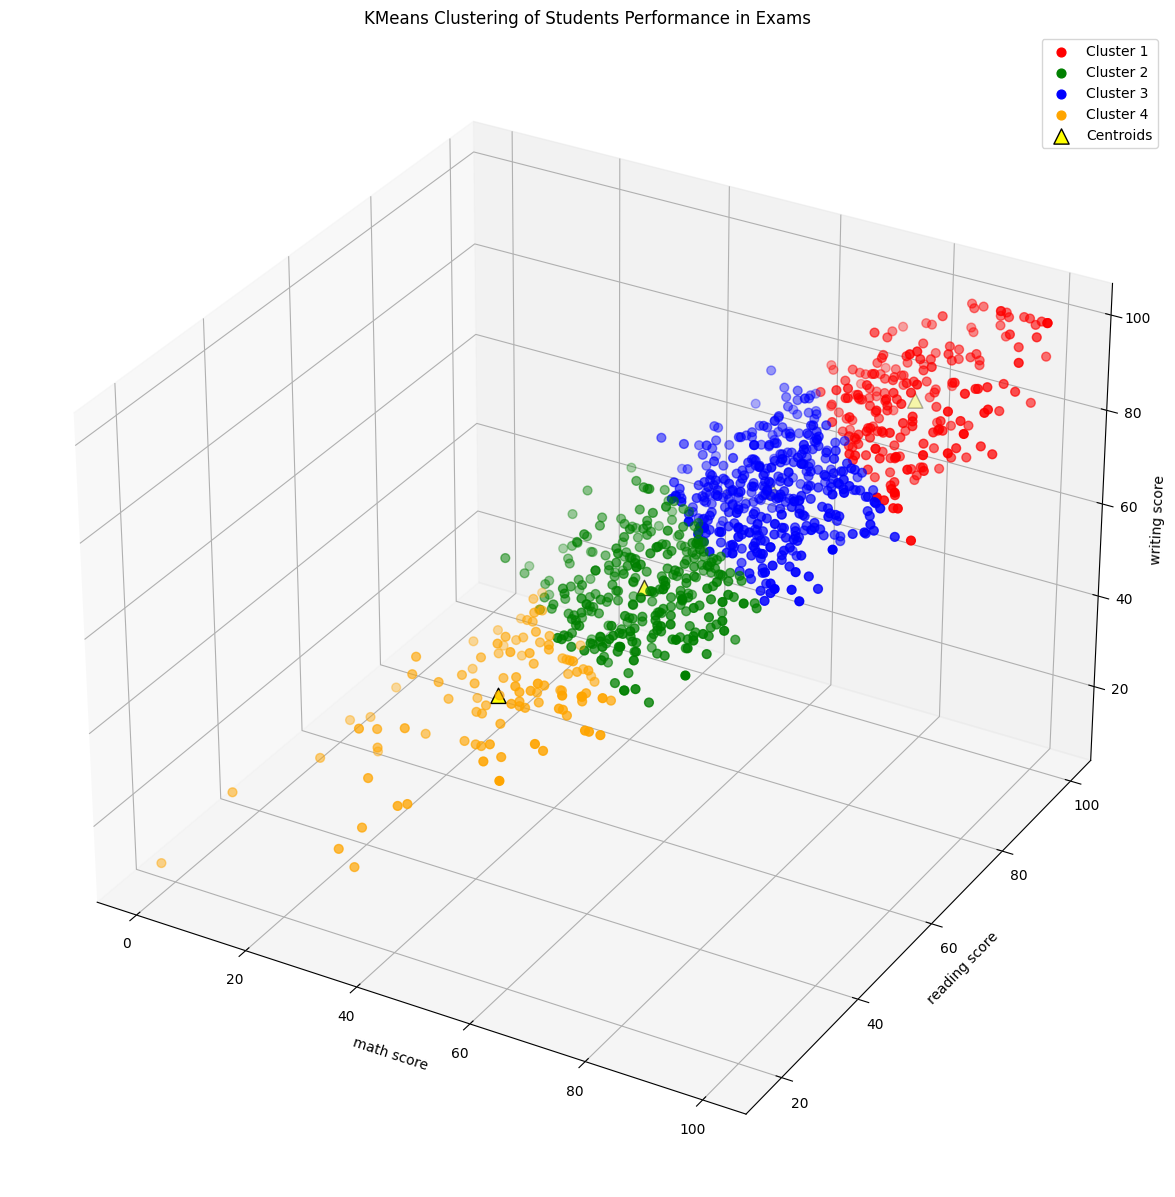

In [65]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['math score'][y_kmeans == 0],data['reading score'][y_kmeans == 0],data['writing score'][y_kmeans == 0],
            s=40, color="red", label='Cluster 1')
ax.scatter(data['math score'][y_kmeans == 1],data['reading score'][y_kmeans == 1],data['writing score'][y_kmeans == 1],
            s=40, color="green", label='Cluster 2')
ax.scatter(data['math score'][y_kmeans == 2],data['reading score'][y_kmeans == 2],data['writing score'][y_kmeans == 2],
            s=40, color="blue", label='Cluster 3')
ax.scatter(data['math score'][y_kmeans == 3],data['reading score'][y_kmeans == 3],data['writing score'][y_kmeans == 3],
            s=40, color="orange", label='Cluster 4')

ax.scatter(kmeans4.cluster_centers_[:, 2], kmeans4.cluster_centers_[:, 3], kmeans4.cluster_centers_[:, 4],
            marker='^', s=120, c='yellow', edgecolor='k', label='Centroids')

plt.title('KMeans Clustering of Students Performance in Exams')
ax.set_xlabel('math score')
ax.set_ylabel('reading score')
ax.set_zlabel('writing score')
ax.legend()
plt.show()